# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 

<a id='zad2'></a>
***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


d:\metody_numeryczne\lab_12\laboratorium-12-MichalMichniak\main.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(y)


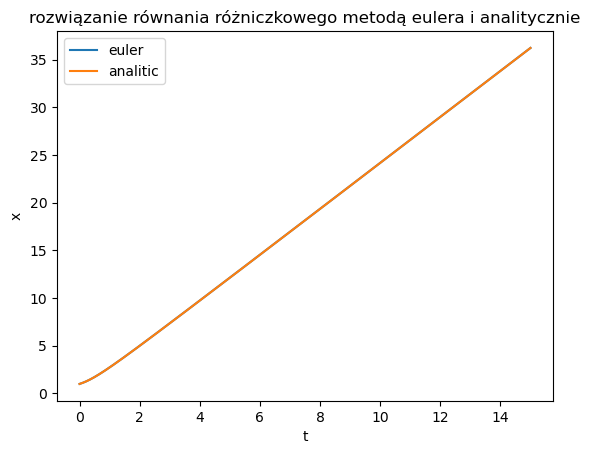

In [36]:
import main
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0,15,10000)
y = main.solve_euler(np.array([lambda t,x: ((x+t)/(x-t))]),t,np.array([1]))
plt.plot(t,y, label = "euler")
plt.plot(t, t+np.sqrt(1+2*t**2), label = "analitic")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.title("rozwiązanie równania różniczkowego metodą eulera i analitycznie")
plt.show()

<a id='zad3'></a>
***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

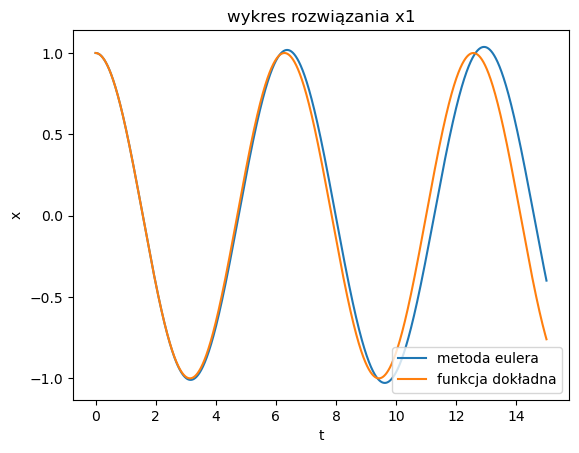

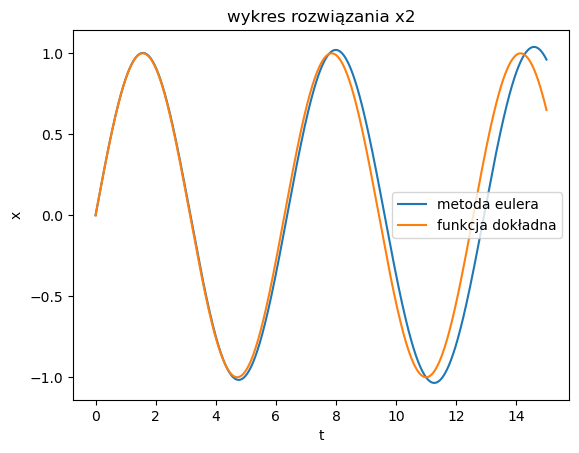

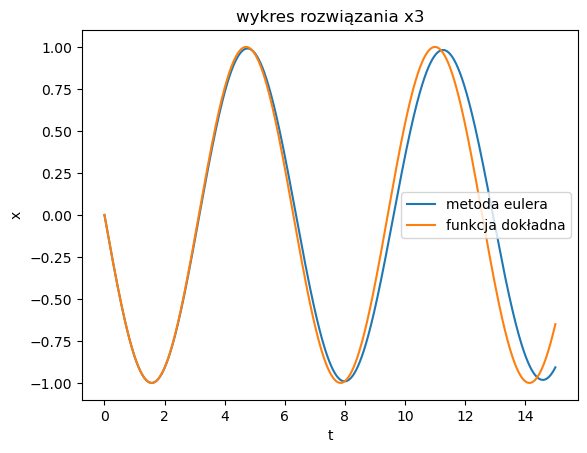

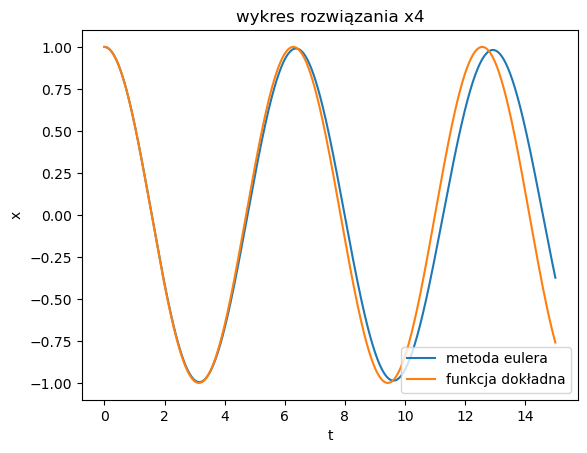

In [37]:
t = np.linspace(0,15,10000)
func = np.array([lambda t,y: y[2],lambda t,y: y[3],lambda t,y: -1*y[0]/(y[0]**2+y[1]**2)**(3/2),lambda t,y: -1*y[1]/(y[0]**2+y[1]**2)**(3/2)])
y = main.solve_euler(func,t,np.array([1,0,0,1]))
plt.plot(t,y[:,0],label="metoda eulera")
plt.plot(t,np.cos(t),label="funkcja dokładna")
plt.title("wykres rozwiązania x1")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()
plt.plot(t,y[:,1],label="metoda eulera")
plt.plot(t,np.sin(t),label="funkcja dokładna")
plt.title("wykres rozwiązania x2")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()
plt.plot(t,y[:,2],label="metoda eulera")
plt.plot(t,-np.sin(t),label="funkcja dokładna")
plt.title("wykres rozwiązania x3")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()
plt.plot(t,y[:,3],label="metoda eulera")
plt.plot(t,np.cos(t),label="funkcja dokładna")
plt.title("wykres rozwiązania x4")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

<a id='zad4'></a>
***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

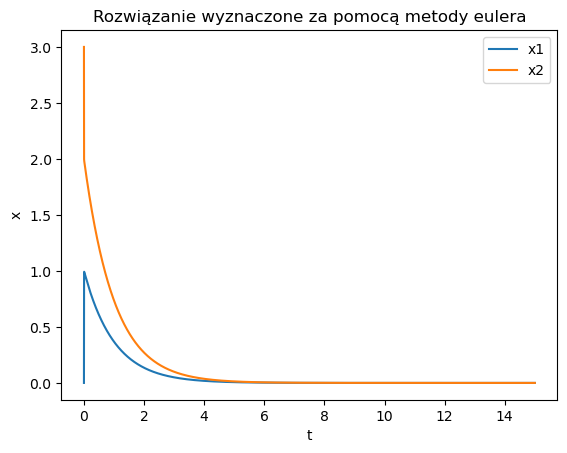

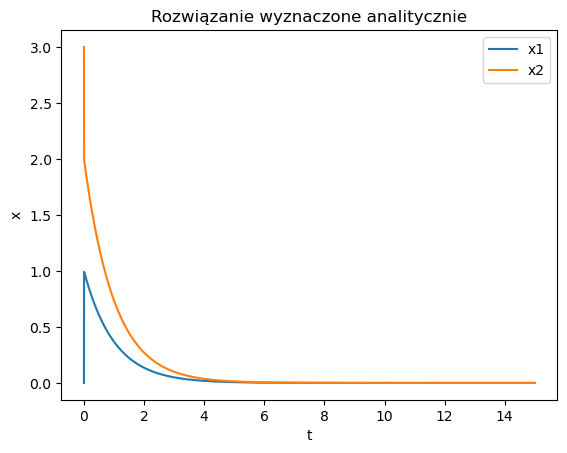

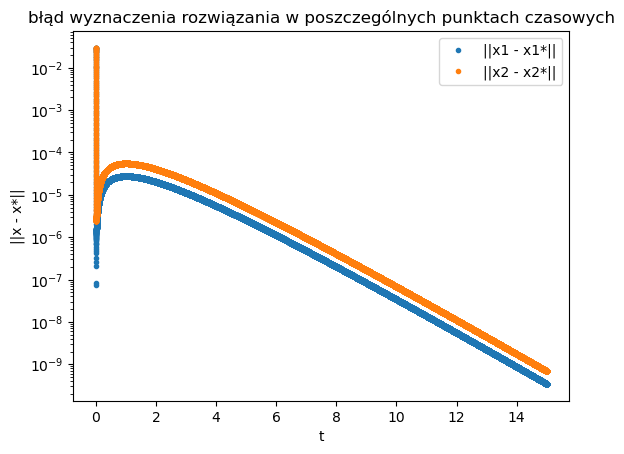

In [38]:
t = np.linspace(0,15,100000)
func = np.array([lambda t,y: -667*y[0]+333*y[1], lambda t,y: 666*y[0]-334*y[1]])
y = main.solve_euler(func,t,np.array([0,3]))
plt.title("Rozwiązanie wyznaczone za pomocą metody eulera")
plt.plot(t,y[:,0], label = "x1")
plt.plot(t,y[:,1], label = "x2")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()
# rozwiązanie wyliczone
xfun = lambda t : np.exp(-t) - np.exp(-1000*t)
yfun = lambda t: 2*np.exp(-t) + np.exp(-1000*t)
plt.title("Rozwiązanie wyznaczone analitycznie")
plt.plot(t,xfun(t), label = "x1")
plt.plot(t,yfun(t), label = "x2")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

plt.title("błąd wyznaczenia rozwiązania w poszczególnych punktach czasowych")
plt.plot(t,abs(xfun(t)-y[:,0]), ".", label = "||x1 - x1*||")
plt.plot(t,abs(yfun(t) - y[:,1]) , ".", label = "||x2 - x2*||")
plt.xlabel("t")
plt.ylabel("||x - x*||")
plt.yscale("log")
plt.legend()
plt.show()

<a id='zad4_porównanie'></a>

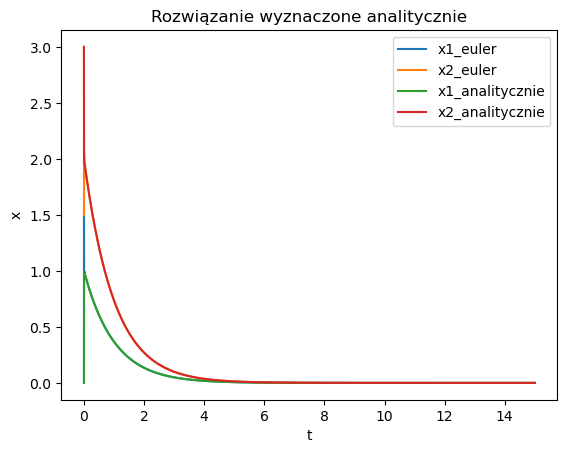

In [57]:
t = np.linspace(0,15,10000)
func = np.array([lambda t,y: -667*y[0]+333*y[1], lambda t,y: 666*y[0]-334*y[1]])
y = main.solve_euler(func,t,np.array([0,3]))
plt.title("Rozwiązanie wyznaczone za pomocą metody eulera")
plt.plot(t,y[:,0], label = "x1_euler")
plt.plot(t,y[:,1], label = "x2_euler")
# rozwiązanie wyliczone
xfun = lambda t : np.exp(-t) - np.exp(-1000*t)
yfun = lambda t: 2*np.exp(-t) + np.exp(-1000*t)
plt.title("Rozwiązanie wyznaczone analitycznie")
plt.plot(t,xfun(t), label = "x1_analitycznie")
plt.plot(t,yfun(t), label = "x2_analitycznie")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
#plt.ylim(0,3)
plt.show()

## Rozwiązanie Analityczne:
ROJ:
$$
\left\{ \begin{array}{cl}
x_{1} = C_{1}e^{-t} + C_{2}e^{-1000t} \\
x_{2} = 2C_{1}e^{-t} - C_{2}e^{-1000t}
\end{array} \right.
$$
wyliczone rozwiązanie dla warunków początkowych: 
$x(0) = \begin{bmatrix}
0 \\
3
\end{bmatrix}$
$$
\left\{ \begin{array}{cl}
x_{1} = e^{-t} - e^{-1000t} \\
x_{2} = 2e^{-t} + e^{-1000t}
\end{array} \right.
$$


***Zadanie 5.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

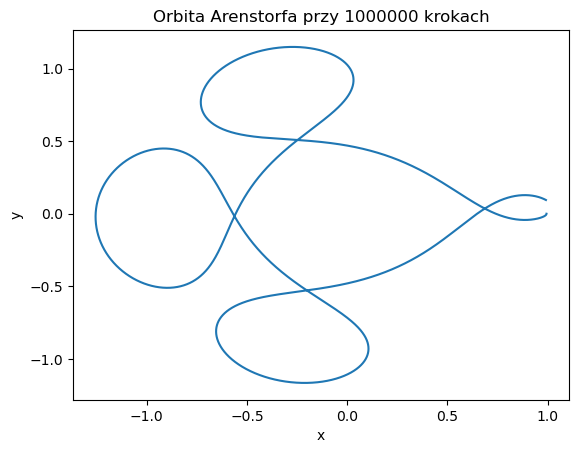

In [39]:
mi = 0.012277471
mi_prim = 1 - mi

T = 17.0652165601579625588917206249
t = np.linspace(0,T,1000000)
D1 = lambda x1,x3: ((x1+mi)**2 + x3**2)**(3/2)
D2 = lambda x1,x3: ((x1-mi_prim)**2 + x3**2)**(3/2)
func = np.array([(lambda t,y: y[1]),(lambda t,y: y[0] + 2*y[3] - (mi_prim*(y[0]+mi)/D1(y[0],y[2])) - (mi*(y[0] - mi_prim)/D2(y[0],y[2]))),(lambda t,y: y[3]),(lambda t,y: y[2] - 2*y[1] - (mi_prim*(y[2])/D1(y[0],y[2])) - (mi*(y[2])/D2(y[0],y[2])))])
y = main.solve_euler(func,t,np.array([0.994,0,0, - 2.00158510637908252240537862224]))
plt.plot(y[:,0],y[:,2]) 
plt.title("Orbita Arenstorfa przy 1000000 krokach")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

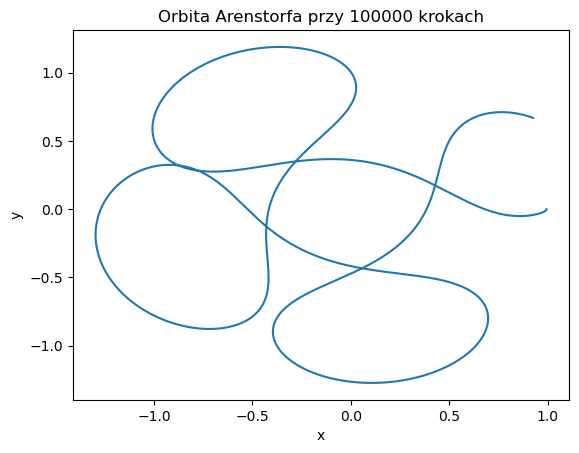

In [40]:
t = np.linspace(0,T,100000)
y = main.solve_euler(func,t,np.array([0.994,0,0, - 2.00158510637908252240537862224]))
plt.plot(y[:,0],y[:,2]) 
plt.title("Orbita Arenstorfa przy 100000 krokach")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

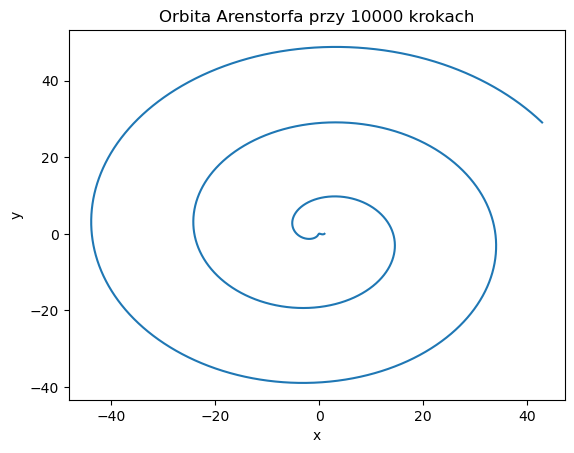

In [42]:
t = np.linspace(0,T,10000)
y = main.solve_euler(func,t,np.array([0.994,0,0, - 2.00158510637908252240537862224]))
plt.plot(y[:,0],y[:,2]) 
plt.title("Orbita Arenstorfa przy 10000 krokach")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Wnioski
Metoda Eulera jest bardzo szybką metodą rozwiązywania równań różniczkowych lecz posiada wadę w postaci kumulowania się błędów poprzez co rozwiązanie już dla średnich czasów symulacji może lekko oddalić się od rozwiązania poprawnego ([zad3](#zad3)) zastosowanie danej metody jest zależne od stabilności rozwiązania równania różniczkowego. dla rozwiązań asymptotycznie stabilnych odchylenie rozwiązania w następnym kroku iteracji spowoduje że wartość bliska punktu nadal będzie zbiegać do rozwiązania analitycznego(właściwość asymptotycznej stabilności). Ten fenomen można zaobserwować w [zad4](#zad4) gdzie wszystkie wyliczone pierwiastki mają ujemną część rzeczywistą. Natomiast dla układów tylko stabilnych ([zad3](#zad3)) metoda Eulera nadaje się tylko do symulacji w krótkich okresach czasu. W zad 5 miałem okazję zapoznać się z układem niestabilnym dla którego dopiero dobranie kroku na poziomie 0.000017. dało w miarę zadowalające wyniki dla kroków większych rozwiązanie było bardzo chaotyczne a przy dość małej ilości kroków orbita była rozbierzna. Na zajęciach miałem okazję zaznajomić się z metodą eulera lecz nie wydaje mi się żeby to był pierwszy raz kiedy ją stosuję. W podobny sposób definiuje się fizykę w różengo rodzaju programach real time (np. grach video). istotnym problemem w tej metodzie jest nawarstwianie się błędów poprzez przyjęcie różniczki jako różnicy oraz fakt istnienia błędów zaokrąglenia. Te właśnie błędy stanowią duży problem przy budowaniu symulacji układów planetarnych 3 ciał i więcejl(three-body problem).

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
